<a href="https://colab.research.google.com/github/aruna09/Amazon-Monitor-Deals-Data-Analysis/blob/main/Amazon_Monitor_Deals_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/My Drive/Amazon-Monitor-Deals"
os.chdir(path)

## Reading training data

In [ ]:
data = pd.read_csv('monitor-deals.csv')

In [ ]:
data.head()
train = data[['Item model number', 'Item Weight in Kg', 'Length(In)', 'Width(In)', 'Height(In)', 'Manufacturer', 'ASIN', 'Brand','Price' ]]

In [ ]:
data.head()

In [ ]:
train.head()

,Item model number,Item Weight in Kg,Length(In),Width(In),Height(In),Manufacturer,ASIN,Brand,Price
0,E248B-FPT168S,2.7765,21.21,15.75,5.95,Sceptre,B097QK6W46,Sceptre,$219.97
1,E275B-FWD240,4.698,24.13,21.14,9.27,Sceptre,B0911MSYGW,Sceptre,$298.97
2,E248W-19203R,2.5965,21.59,7.02,15.83,Sceptre Inc.,B0773ZY26F,Sceptre,$139.97
3,E249W-FPT,2.709,21.25,15.53,7.03,Sceptre,B092XF3W9T,Sceptre,$154.97
4,E209W-16003RT,1.9305,18.01,7.02,13.58,Sceptre,B078HMK7S3,Sceptre,$119.97


In [ ]:
features = train[['ASIN', 'Item model number', 'Item Weight in Kg', 'Manufacturer',	'Brand', 'Length(In)', 'Width(In)', 'Height(In)', 'Price']]

## Preprocessing

This data is directly scraped from the Amazon and has a lot of scope for pre-processing.

I have done some of these in an excel/google sheet, because it was easy.

1. Drop duplicate rows
2. Convert categorial columns to one case, lowercase in this scenario.
3. Transform the Price($) to Price(Rs)
4. Transform the Item Weight(Pounds/Ounces) to Item Weight(Kg)
5. Impute null values

In [ ]:
def drop_duplicates(dataframe):
  dataframe = dataframe.drop_duplicates()
  return dataframe

In [ ]:
def make_lowercase(dataframe, column_name):
  dataframe[column_name] = dataframe[column_name].str.lower()
  dataframe[column_name] = dataframe[column_name].str.lower()
  return dataframe

In [ ]:
def rename_columns(dataframe, old_name, new_name):
  return dataframe.rename(columns={old_name:new_name})

In [ ]:
# Taking care of Price column
def pre_process_price(dataframe):
  dataframe["Price"] = dataframe['Price'].str.replace('$', '')
  dataframe["Price"] = dataframe.Price.str.replace(',', '')
  dataframe["Price"] = dataframe.Price.str.replace(' ', '')

  dataframe['Price'] = pd.to_numeric(features['Price'])
  dataframe['Price(Rs)'] = (dataframe.Price * 75).astype(int)

  dataframe.rename(columns={"Price":"PriceInDollars"})
  return dataframe

In [ ]:
def preprocessing_weight(dataframe):
  #train['Item Weight in Kg'] = train['Item Weight in Kg'].fillna(0)
  dataframe["Weight(Kg)"] = dataframe['Weight(Kg)'].str.replace('#VALUE', '0')
  dataframe["Weight(Kg)"] = dataframe['Weight(Kg)'].str.replace('0!', '0')
  dataframe['Weight(Kg)'] = dataframe['Weight(Kg)'].astype(float, errors='raise')
  return dataframe

In [ ]:
features = drop_duplicates(features)
features = make_lowercase(features, 'Manufacturer')
features = rename_columns(features, 'Item Weight in Kg', 'Weight(Kg)')
features = pre_process_price(features)
features = preprocessing_weight(features)

In [ ]:
# As queried using SQL we observe that "Kuman" Brand has only Kuman Manufacturer. Hence imputing it.
# All possible Brand names imputed by using Manufacturer names and known references, using Big query
features.loc[((features['Brand'] == "Kuman"), ["Manufacturer"])] = "Kuman"
features.loc[((features['Manufacturer'] == "Acer America Corp."), ["Manufacturer"])] = "Acer America Corporation"

features.loc[((features['Manufacturer'] == "VSDISPLAY"), ["Brand"])] = "VSDISPLAY"
features.loc[((features['Manufacturer'] == "NEC"), ["Brand"])] = "NEC"
features.loc[((features['Manufacturer'] == "EIZO"), ["Brand"])] = "Eizo"
features.loc[((features['Manufacturer'] == "STONE"), ["Brand"])] = "STONE"
features.loc[((features['Manufacturer'] == "Zopsc"), ["Brand"])] = "Zopsc"
features.loc[((features['Manufacturer'] == "Dicota"), ["Brand"])] = "Dicota"
features.loc[((features['Manufacturer'] == "FORITO"), ["Brand"])] = "FORITO"
features.loc[((features['Manufacturer'] == "Samsung"), ["Brand"])] = "Samsung"
features.loc[((features['Manufacturer'] == "Sceptre"), ["Brand"])] = "Sceptre"
features.loc[((features['Manufacturer'] == "Durable"), ["Brand"])] = "Durable"
features.loc[((features['Manufacturer'] == "XYG-Raspberry Pi"), ["Brand"])] = "XYG-Raspberry Pi"
features.loc[((features['Manufacturer'] == "Samsung"), ["Brand"])] = "Samsung"
features.loc[((features['Manufacturer'] == "Jun-Electron"), ["Brand"])] = "JUN-ELECTRON"
features.loc[((features['Manufacturer'] == "ViewSonic Corporation"), ["Brand"])] = "ViewSonic"
features.loc[((features['Manufacturer'] == "VSDISPLAY"), ["Brand"])] = "VSDISPLAY"
features.loc[((features['Manufacturer'] == "MUBUY-GOL"), ["Brand"])] = "MUBUY-GOL"
features.loc[((features['Manufacturer'] == "J J-Dream"), ["Brand"])] = "J J-Dream"
features.loc[((features['Manufacturer'] == "Deco Gear"), ["Brand"])] = "Deco Gear"
features.loc[((features['Manufacturer'] == "Dell Computers"), ["Brand"])] = "Dell"
features.loc[((features['Manufacturer'] == "Plugable"), ["Brand"])] = "Plugable"
features.loc[((features['Manufacturer'] == "ORIGINAL"), ["Brand"])] = "ORIGINAL"
features.loc[((features['Manufacturer'] == "LILLIPUT"), ["Brand"])] = "LILLIPUT"
features.loc[((features['Manufacturer'] == "Sceptre"), ["Brand"])] = "Sceptre"
features.loc[((features['Manufacturer'] == "iLooker"), ["Brand"])] = "ILooker"
features.loc[((features['Manufacturer'] == "Sceptre"), ["Brand"])] = "Sceptre"
features.loc[((features['Manufacturer'] == "Targus"), ["Brand"])] = "Targus"
features.loc[((features['Manufacturer'] == "suptek"), ["Brand"])] = "Suptek"
features.loc[((features['Manufacturer'] == "Asus"), ["Brand"])] = "Asus"

## Visualizations.

In [ ]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

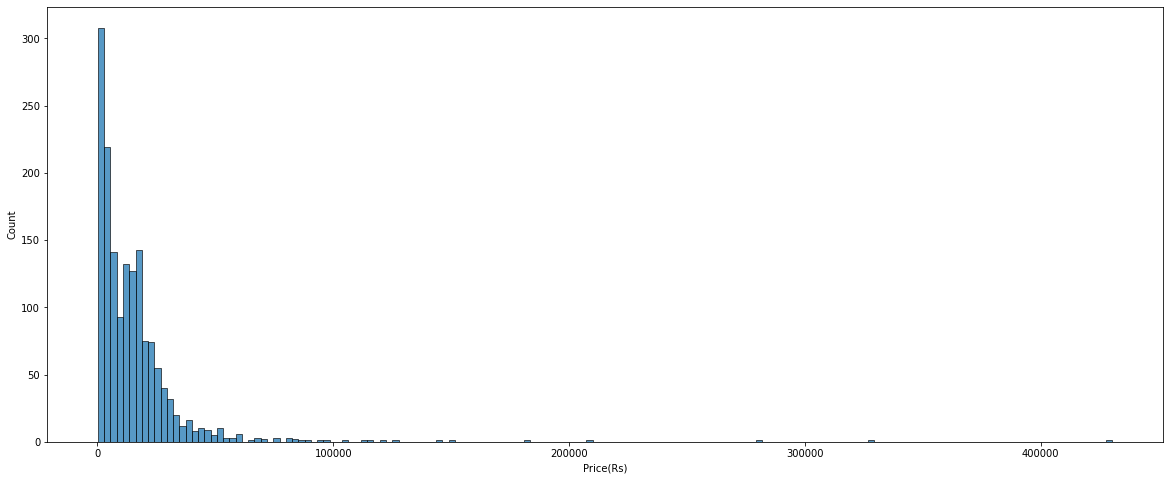

In [ ]:
# converting to log_scales as the data is highly skewed.
sns.histplot(data=features, x='Price(Rs)')

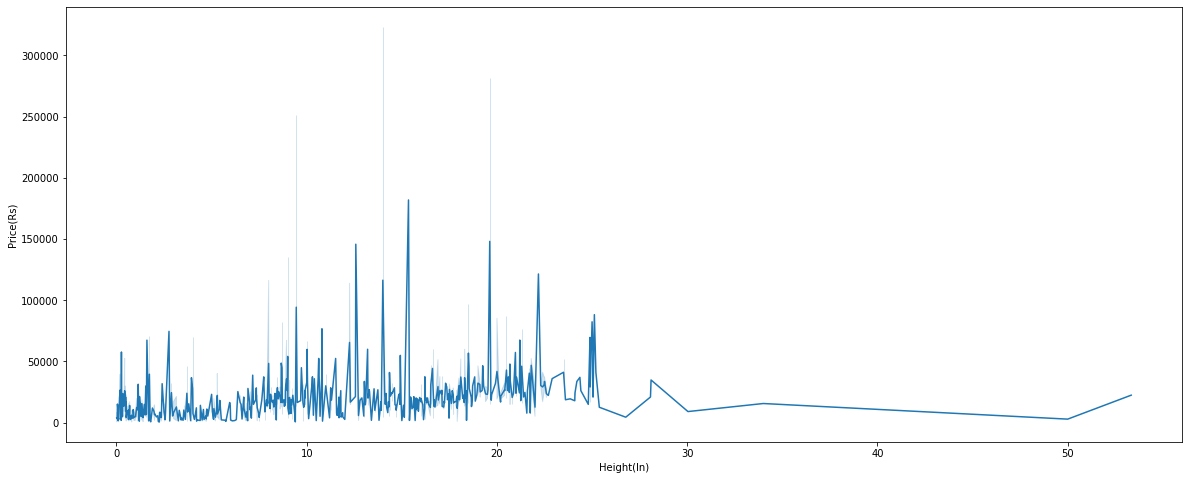

In [ ]:
sns.lineplot(x="Height(In)", y="Price(Rs)", data=features)

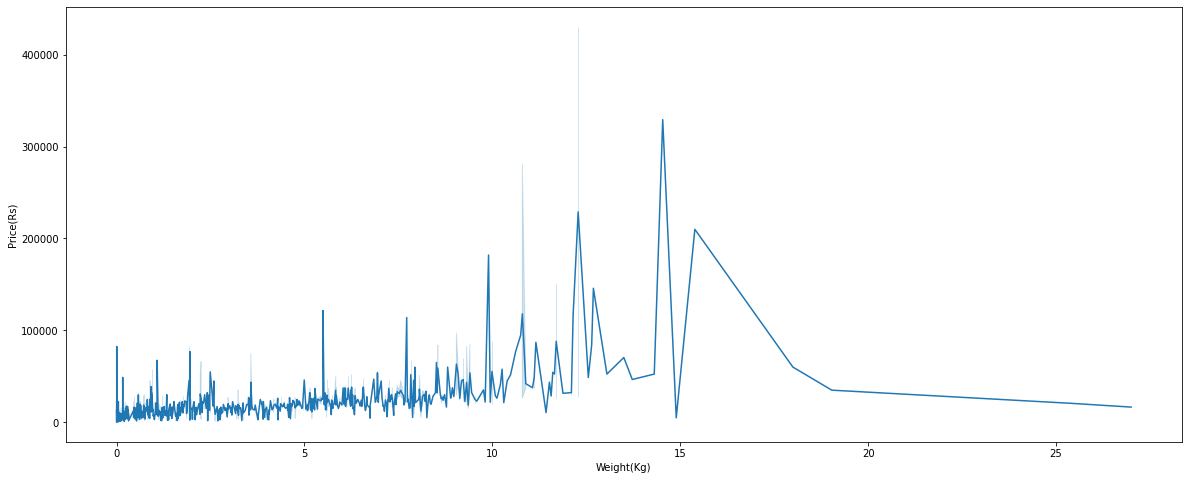

In [ ]:
sns.lineplot(x="Weight(Kg)", y="Price(Rs)", data=features)

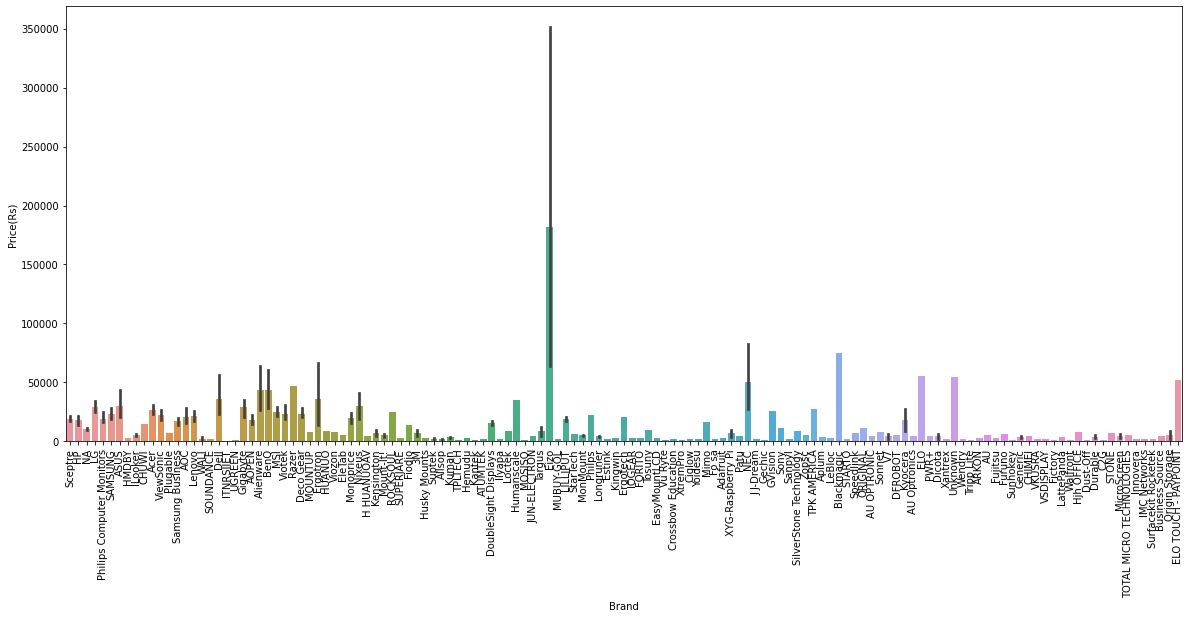

In [ ]:
plt.xticks(rotation=90)
fig_size[0] = 30
sns.barplot(x="Brand", y="Price(Rs)", data=features)

Finally imputing all the left over empty values with NA or 0 depending on the context.

In [ ]:
# Let's now impute the rest of the Brand and Manufacturer values as "Data Not Present"
features['ASIN'].fillna("NA", inplace=True)
features.loc[:,'Item model number'].fillna("NA", inplace=True)
features['Brand'].fillna("NA", inplace=True)
features['Manufacturer'].fillna("NA", inplace=True)

## Now split into Train, Test and Validation sets to avoid data leakage

In [ ]:
features_X = features[['ASIN', 'Item model number', 'Weight(Kg)', 'Manufacturer',	'Brand', 'Length(In)', 'Width(In)', 'Height(In)']]
features_Y = features[['Price(Rs)']]

In [ ]:
from sklearn.model_selection import train_test_split

#Split dataset into train, test and validation
X_train, X_test, y_train, y_test = train_test_split(features_X, features_Y, test_size = 0.33)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.33)

## Feature Engineering

### Imputing Length, Width, Height and Weight columns by Group Mean

In [ ]:
def impute_by_groupmean(dataframe, column_to_impute, reference_column):
  dataframe[column_to_impute] = dataframe[column_to_impute].fillna(dataframe.groupby(reference_column)[column_to_impute].transform('mean'))
  return dataframe

In [ ]:
X_train = impute_by_groupmean(X_train, 'Length(In)', 'Item model number')
X_train = impute_by_groupmean(X_train, 'Width(In)', 'Item model number')
X_train = impute_by_groupmean(X_train, 'Height(In)', 'Item model number')
X_train = impute_by_groupmean(X_train, 'Weight(Kg)', 'Item model number')

X_test = impute_by_groupmean(X_test, 'Length(In)', 'Item model number')
X_test = impute_by_groupmean(X_test, 'Width(In)', 'Item model number')
X_test = impute_by_groupmean(X_test, 'Height(In)', 'Item model number')
X_test = impute_by_groupmean(X_test, 'Weight(Kg)', 'Item model number')

X_validation = impute_by_groupmean(X_validation, 'Length(In)', 'Item model number')
X_validation = impute_by_groupmean(X_validation, 'Width(In)', 'Item model number')
X_validation = impute_by_groupmean(X_validation, 'Height(In)', 'Item model number')
X_validation = impute_by_groupmean(X_validation, 'Weight(Kg)', 'Item model number')

In [ ]:
X_train['Length(In)'].fillna(0, inplace=True)
X_test['Length(In)'].fillna(0, inplace=True)
X_validation['Length(In)'].fillna(0, inplace=True)

X_train['Width(In)'].fillna(0, inplace=True)
X_test['Width(In)'].fillna(0, inplace=True)
X_validation['Width(In)'].fillna(0, inplace=True)

X_train['Height(In)'].fillna(0, inplace=True)
X_test['Height(In)'].fillna(0, inplace=True)
X_validation['Height(In)'].fillna(0, inplace=True)

X_train['Weight(Kg)'].fillna(0, inplace=True)
X_test['Weight(Kg)'].fillna(0, inplace=True)
X_validation['Weight(Kg)'].fillna(0, inplace=True)

## Encoding categorical variables(Brand and Manufacturer) using Mean Encoding method. Found this really cool blog about different types of encodings here: [All about Categorical Variable encodings](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)

In [ ]:
def mean_encode_column(dataframe, column_to_encode, reference_column):
  encoded_column = column_to_encode + '_mean_encoding'
  mean_encode = dataframe.groupby(column_to_encode)[reference_column].mean()
  dataframe.loc[:, encoded_column] = dataframe[column_to_encode].map(mean_encode)
  return dataframe

In [ ]:
def frequency_encode_column(dataframe, column_to_encode):
  encoded_column = column_to_encode + '_frequency_encoding'
  frequency_encode = dataframe.groupby(column_to_encode).size()/len(dataframe)
  dataframe.loc[:, encoded_column] = features[column_to_encode].map(frequency_encode)
  return dataframe


### Run this snippet to Mean Encode Manufacturer and Brand columns. 

In [ ]:
X_train['Price(Rs)'] = y_train['Price(Rs)']
X_train = mean_encode_column(X_train, 'Manufacturer', 'Price(Rs)')
X_train = mean_encode_column(X_train, 'Brand', 'Price(Rs)')
X_train.drop('Price(Rs)', 1)

X_test['Price(Rs)'] = y_test['Price(Rs)']
X_test = mean_encode_column(X_test, 'Manufacturer', 'Price(Rs)')
X_test = mean_encode_column(X_test, 'Brand', 'Price(Rs)')
X_test.drop('Price(Rs)', 1)

X_validation['Price(Rs)'] = y_validation['Price(Rs)']
X_validation = mean_encode_column(X_validation, 'Manufacturer', 'Price(Rs)')
X_validation = mean_encode_column(X_validation, 'Brand', 'Price(Rs)')
X_validation.drop('Price(Rs)', 1)

,ASIN,Item model number,Weight(Kg),Manufacturer,Brand,Length(In),Width(In),Height(In),Manufacturer_mean_encoding,Brand_mean_encoding
328,B08KFNB3YR,DGVM29PB,6.7500,deco gear,Deco Gear,27.300000,7.800000,19.5000,23249.000000,23249.000000
1030,B073W4MRXQ,XtremPro 11110,1.3500,htii,XtremPro,14.560000,11.360000,4.2100,1274.000000,1274.000000
52,B07Z8TC28F,VA24EHE,4.5000,asus,ASUS,21.280000,15.890000,8.0300,39818.650000,38511.761905
979,B099N65PGL,3.2inch 320x240 Touch LCD (C),0.0422,top1,NA,0.000000,0.000000,0.0000,2755.000000,10043.599057
946,B01A0FEBXQ,Z35 bmiphz,11.6550,acer america corporation,Acer,33.200000,11.800000,21.8000,52499.000000,29377.125000
...,...,...,...,...,...,...,...,...,...,...
1952,B07K9KNKL3,NA,0.2120,ebestpanel,NA,9.234444,8.750278,4.0025,14894.318182,10043.599057
148,B07GG8RVXP,C248B-144R,2.8440,sceptre inc.,Sceptre,21.500000,15.600000,5.4000,14961.000000,22223.545455
1795,B07MFHJH5M,273V7QJAB,4.5000,envision,Philips Computer Monitors,24.100000,17.800000,8.9000,20456.000000,20456.000000
610,B08448J4G5,x27i,7.2900,hewlett packard,HP,24.060000,20.120000,8.5200,18803.333333,16789.857143


### Run this to Frequency Encode Manufacturer and Brand columns.

In [ ]:
X_train = frequency_encode_column(X_train, 'Manufacturer')
X_train = frequency_encode_column(X_train, 'Brand')

X_test = frequency_encode_column(X_test, 'Manufacturer')
X_test = frequency_encode_column(X_test, 'Brand')

X_validation = frequency_encode_column(X_validation, 'Manufacturer')
X_validation = frequency_encode_column(X_validation, 'Brand')

## Encoding "ASIN" and "ItemModelNumber" using Label encoding. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoding_column(dataframe, column_to_encode):
  encoded_column = column_to_encode + '_label_encoded'
  dataframe[encoded_column] = LabelEncoder().fit_transform(dataframe[column_to_encode])
  return dataframe

In [ ]:
label_encoding_column(X_train, 'ASIN')
label_encoding_column(X_train, 'Item model number')

label_encoding_column(X_test, 'ASIN')
label_encoding_column(X_test, 'Item model number')

label_encoding_column(X_validation, 'ASIN')
label_encoding_column(X_validation, 'Item model number')

,ASIN,Item model number,Weight(Kg),Manufacturer,Brand,Length(In),Width(In),Height(In),Price(Rs),Manufacturer_mean_encoding,Brand_mean_encoding,Manufacturer_frequency_encoding,Brand_frequency_encoding,ASIN_label_encoded,Item model number_label_encoded
328,B08KFNB3YR,DGVM29PB,6.7500,deco gear,Deco Gear,27.300000,7.800000,19.5000,20999,23249.000000,23249.000000,0.008621,0.008621,227,77
1030,B073W4MRXQ,XtremPro 11110,1.3500,htii,XtremPro,14.560000,11.360000,4.2100,1274,1274.000000,1274.000000,0.002874,0.002874,53,214
52,B07Z8TC28F,VA24EHE,4.5000,asus,ASUS,21.280000,15.890000,8.0300,15675,39818.650000,38511.761905,0.057471,0.060345,163,182
979,B099N65PGL,3.2inch 320x240 Touch LCD (C),0.0422,top1,NA,0.000000,0.000000,0.0000,1311,2755.000000,10043.599057,0.005747,0.609195,322,25
946,B01A0FEBXQ,Z35 bmiphz,11.6550,acer america corporation,Acer,33.200000,11.800000,21.8000,52499,52499.000000,29377.125000,0.002874,0.045977,22,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,B07K9KNKL3,NA,0.2120,ebestpanel,NA,9.234444,8.750278,4.0025,10350,14894.318182,10043.599057,0.063218,0.609195,96,143
148,B07GG8RVXP,C248B-144R,2.8440,sceptre inc.,Sceptre,21.500000,15.600000,5.4000,19425,14961.000000,22223.545455,0.005747,0.031609,90,65
1795,B07MFHJH5M,273V7QJAB,4.5000,envision,Philips Computer Monitors,24.100000,17.800000,8.9000,16163,20456.000000,20456.000000,0.005747,0.005747,106,14
610,B08448J4G5,x27i,7.2900,hewlett packard,HP,24.060000,20.120000,8.5200,25425,18803.333333,16789.857143,0.008621,0.020115,178,219


In [ ]:
X_train_features = X_train.drop(columns=['ASIN', 'Item model number', 'Brand', 'Manufacturer'])
X_test_features = X_test.drop(columns=['ASIN', 'Item model number', 'Brand', 'Manufacturer'])
X_validation_features = X_validation.drop(columns=['ASIN', 'Item model number', 'Brand', 'Manufacturer'])

In [ ]:
X_train_features

,Weight(Kg),Length(In),Width(In),Height(In),Price(Rs),Manufacturer_mean_encoding,Brand_mean_encoding,Manufacturer_frequency_encoding,Brand_frequency_encoding,ASIN_label_encoded,Item model number_label_encoded
1458,0.14000,3.540000,1.180000,0.910000,1949,1949.000000,10905.875931,0.001420,0.572443,100,121
1191,0.01408,0.000000,0.000000,0.000000,1363,3091.800000,10905.875931,0.007102,0.572443,506,17
325,5.31000,22.000000,9.300000,18.000000,18749,26127.809524,27909.720930,0.059659,0.061080,385,442
921,3.60000,21.260000,2.560000,12.720000,14109,38880.750000,27909.720930,0.005682,0.061080,169,400
1688,0.45000,14.100000,0.320000,1.000000,4419,30251.708333,28953.320000,0.034091,0.035511,14,3
...,...,...,...,...,...,...,...,...,...,...,...
1315,0.84150,12.831935,10.412419,4.581774,10724,10057.402985,10905.875931,0.095170,0.572443,522,304
1645,0.14800,12.831935,10.412419,4.581774,3636,1961.750000,10905.875931,0.005682,0.572443,672,304
1159,0.30200,0.000000,0.000000,0.000000,5699,3091.800000,10905.875931,0.007102,0.572443,663,94
612,14.31000,28.640000,11.380000,23.500000,52425,26127.809524,27909.720930,0.059659,0.061080,453,445


## Model Building and Training.

###Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_features, y_train)
reg.score(X_train_features, y_train)

1.0

In [ ]:
y_predicted = reg.predict(X_test_features)
y_predicted

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 5.155555708315905e-12
Mean Squared Error: 5.585625741219182e-23
Root Mean Squared Error: 7.473704396896616e-12


### Results when Brand and Manufacturer are Mean Encoded:
Score: 1.0

Mean Absolute Error: 6.981335655155346e-12

Mean Squared Error: 7.56577649328822e-23

Root Mean Squared Error: 8.698147212647197e-12

### Results when Brand and Manufacturer are Frequency Encoded:
Score: 0.42

Mean Absolute Error: 7405.694906626668

Mean Squared Error: 135540742.9914126

Root Mean Squared Error: 11642.196656619944


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train_features, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
y_predicted = regressor.predict(X_test_features)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 116.44029865125249
Mean Squared Error: 409670.1409523604
Root Mean Squared Error: 640.0547952733112


### Results when Brand and Manufacturer are Mean Encoded:

Mean Absolute Error: 377.01587668593453

Mean Squared Error: 39409930.75191446

Root Mean Squared Error: 6277.732930916579

### Results when Brand and Manufacturer are Frequency Encoded:

Mean Absolute Error: 6752.6699259582465

Mean Squared Error: 156536303.4140938

Root Mean Squared Error: 12511.446895307265